In [28]:
import glob
import numpy as np
from natsort import natsorted # type: ignore
import matplotlib.pyplot as plt


# Base directory where the folders are located
base_directory = 'results30x10'

# Use glob to find all .txt files in the directory and subdirectories
file_paths = glob.glob(f'{base_directory}/{base_directory}_*/*.txt', recursive=True)
file_paths = natsorted(file_paths)

# Function to read all .txt files
def read_all_txt_files(file_paths):
    data = []
    for file_path in file_paths:
        file_data = np.loadtxt(file_path)
        data.append((file_data))
    return data

# Read all .txt files and store their content
s = np.array(read_all_txt_files(file_paths))
np.savetxt('slowness30x10.csv', s, delimiter=',', fmt='%.12f')

data = [s[i::10] for i in range(10)]
data = np.array(data)
velocity_inversion = 1/data

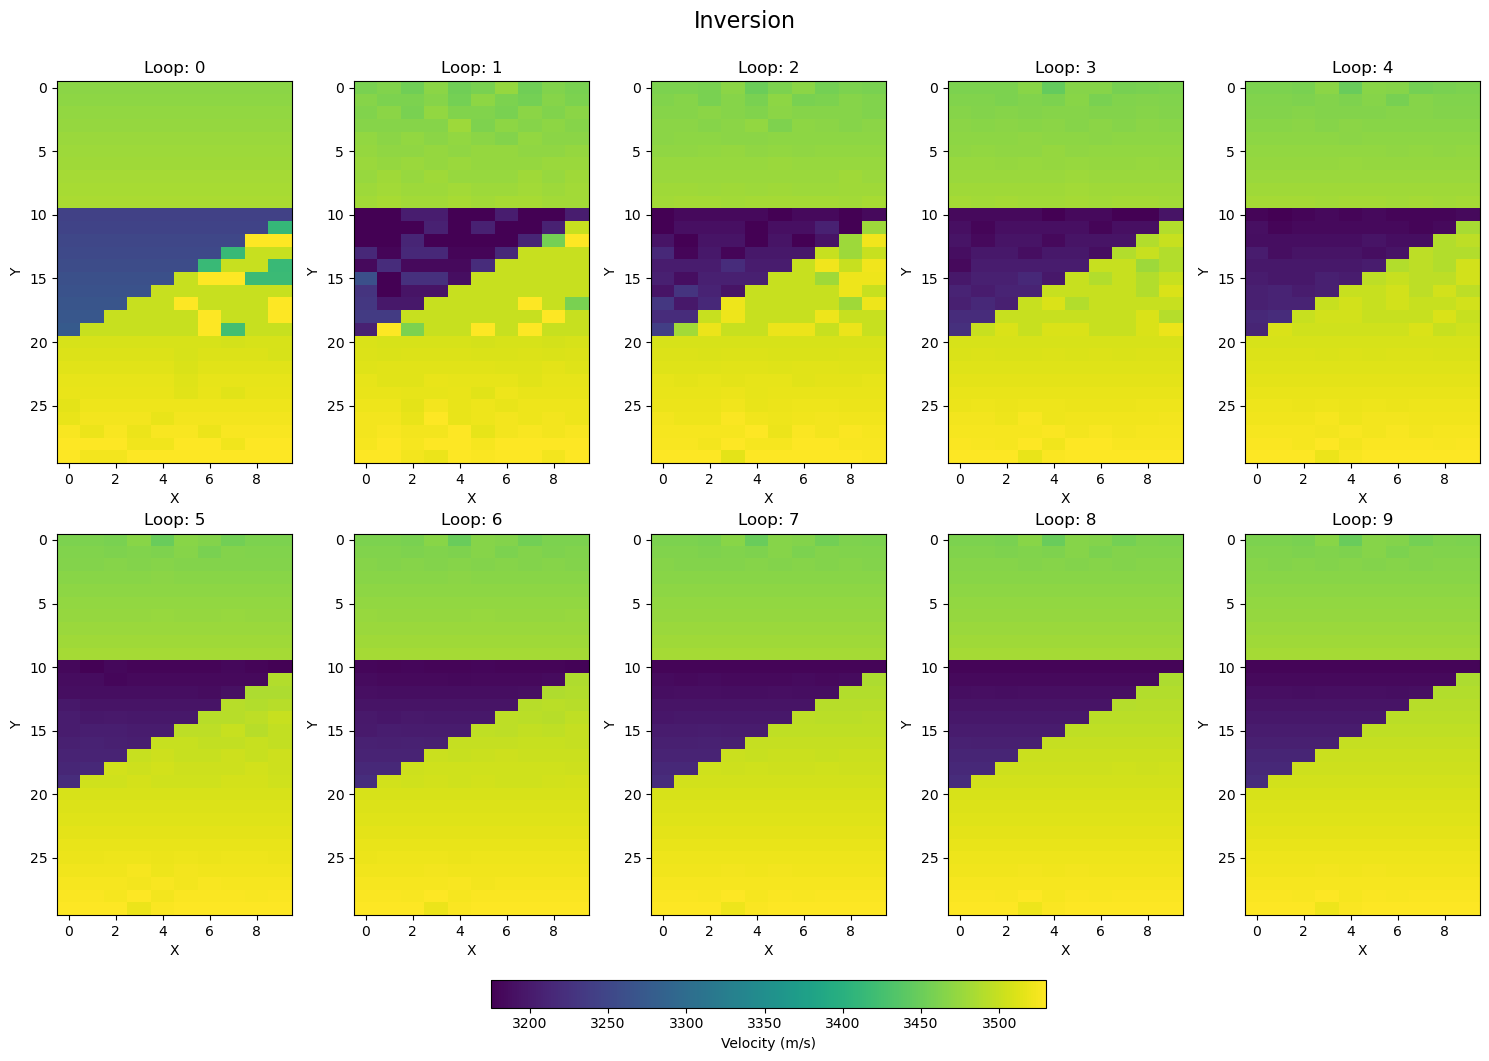

In [61]:
# Create a 2x5 grid to display the matrices using imshow
cols = 5  # Number of columns
rows = 2  # Number of rows

fig, axes = plt.subplots(rows, cols, figsize=(15, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

vmin, vmax = 3175, 3530


# Loop through each matrix and plot
for i, data in enumerate(velocity_inversion):
    # Plot the data
    im = axes[i].imshow(data, cmap='viridis', aspect='auto', vmin=vmin, vmax=vmax)
    axes[i].set_title(f'Loop: {i}')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')

# Adjust the layout to make room for the colorbar at the bottom
fig.tight_layout(rect=[0, 0.1, 1, 0.95])

# Add a single colorbar for all subplots at the bottom
cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.03, pad=0.07)
cbar.set_label('Velocity (m/s)')

# Add a title for the entire plot
fig.suptitle('Inversion', fontsize=16)

plt.show()

Text(0, 0.5, 'Y')

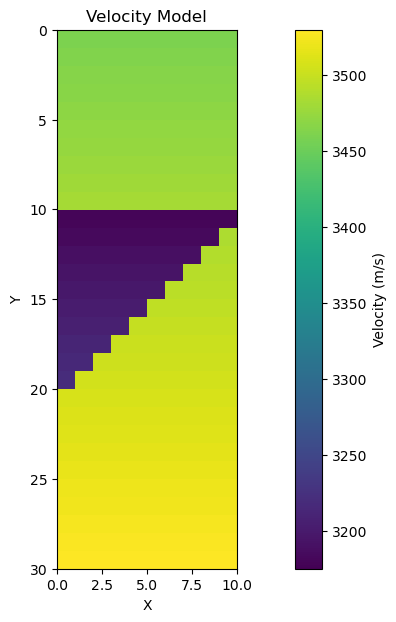

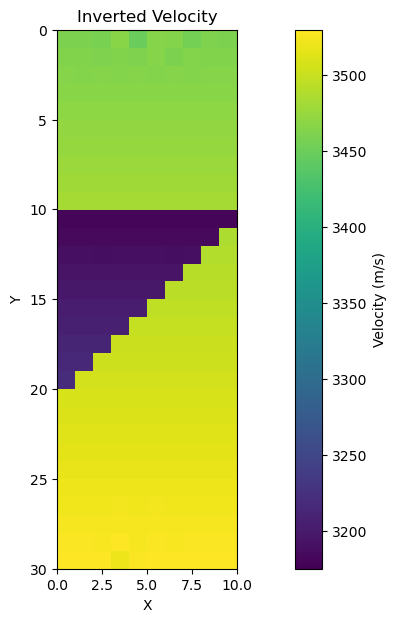

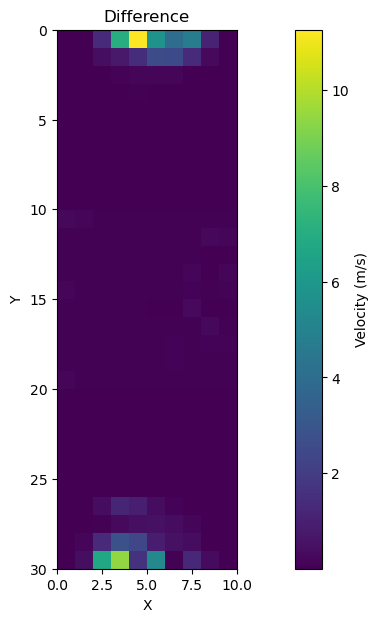

In [79]:
# define models
rows, cols = 30, 10
grid_size = (rows, cols)
min_velocity = 3460
max_velocity = 3530
wedge_min_velocity = 3180
wedge_max_velocity = 3220
wedge_start_row = 10
wedge_end_row = 20

# Create a background velocity model with values ranging from 3460 to 3530
velocity_model = np.linspace(min_velocity, max_velocity, rows).reshape(-1, 1)
velocity_model = np.repeat(velocity_model, cols, axis=1)


# Create a triangular wedge shape with vertices at (0, 10), (0, 20), and (10, 10)
for i in range(wedge_start_row, wedge_end_row):
    row_velocity = np.linspace(wedge_min_velocity, wedge_max_velocity, wedge_end_row - wedge_start_row)[i - wedge_start_row]
    num_cols_in_wedge = wedge_end_row - i
    velocity_model[i, :num_cols_in_wedge] = row_velocity

plt.figure(figsize=(15, 7))  
plt.imshow(velocity_model, cmap='viridis', interpolation='nearest', extent=[0, cols, rows, 0], origin='upper', vmin=3175, vmax=3530)
plt.colorbar(label='Velocity (m/s)')
plt.title('Velocity Model')
plt.xlabel('X')
plt.ylabel('Y')

plt.figure(figsize=(15, 7))  
plt.imshow(velocity_inversion[9], cmap='viridis', interpolation='nearest', extent=[0, cols, rows, 0], origin='upper', vmin=3175, vmax=3530)
plt.colorbar(label='Velocity (m/s)')
plt.title('Inverted Velocity')
plt.xlabel('X')
plt.ylabel('Y')

plt.figure(figsize=(15, 7))  
plt.imshow(np.abs(velocity_model-velocity_inversion[9]), cmap='viridis', interpolation='nearest', extent=[0, cols, rows, 0], origin='upper')
plt.colorbar(label='Velocity (m/s)')
plt.title('Difference')
plt.xlabel('X')
plt.ylabel('Y')